# GradBoost Model

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"seaborn version: {sns.__version__}")
print(f"numpy version: {np.__version__}")

import sklearn
print(f"sklearn version: {sklearn.__version__}")

import sys
print(f"Python version: {sys.version}")

pandas version: 2.2.3
matplotlib version: 3.9.2
seaborn version: 0.13.2
numpy version: 1.26.4
sklearn version: 1.1.3
Python version: 3.9.21 (main, Dec 11 2024, 10:23:52) 
[Clang 14.0.6 ]


### Import data

In [2]:
players_all = pd.read_csv('../games_by_players_all.csv', encoding='utf8')
players_ranked = pd.read_csv('../games_by_players_ranked.csv', encoding='utf8')
players_pro = pd.read_csv('../games_by_players_pro.csv', encoding='utf8')

teams_all = pd.read_csv('../games_by_team_all_added_features.csv', encoding='utf8')
teams_ranked = pd.read_csv('../games_by_team_ranked_added_features.csv', encoding='utf8')
teams_pro = pd.read_csv('../games_by_team_pro_added_features.csv', encoding='utf8')

small_file = pd.read_csv('../small_csv_file.csv', encoding='utf8')

In [3]:
players_all = players_all.drop(columns = ['game_id', 'player_tag', 'pro'])
players_ranked = players_ranked.drop(columns = ['game_id', 'player_tag', 'pro'])
players_pro = players_pro.drop(columns = ['game_id', 'player_tag', 'pro'])

small_file = small_file.drop(columns = ['game_id', 'player_tag', 'pro'])

# Team
teams_all = teams_all.drop(columns = ['pro'])
teams_ranked = teams_ranked.drop(columns = ['pro'])
teams_pro = teams_pro.drop(columns = ['pro'])

In [4]:
players_all.head()

,movement_avg_speed,movement_total_distance,movement_time_supersonic_speed,movement_time_boost_speed,movement_time_slow_speed,movement_time_ground,movement_time_low_air,movement_time_high_air,movement_time_powerslide,movement_count_powerslide,...,positioning_percent_neutral_third,positioning_percent_defensive_half,positioning_percent_offensive_half,positioning_percent_behind_ball,positioning_percent_infront_ball,positioning_percent_most_back,positioning_percent_most_forward,positioning_percent_closest_to_ball,positioning_percent_farthest_from_ball,winner
0,1468.0,505882.0,40.34,142.29,196.16,219.80,143.43,15.56,8.01,68.0,...,26.72,83.53,16.47,75.83,24.17,31.88,28.71,39.66,28.51,False
1,1410.0,474841.0,41.74,122.11,208.83,248.88,115.01,8.80,5.41,30.0,...,24.45,79.52,20.48,67.56,32.44,31.06,36.93,31.49,32.85,False
2,1355.0,465999.0,35.87,119.38,223.64,212.03,145.07,21.79,7.24,36.0,...,26.17,80.77,19.23,67.72,32.28,37.22,32.79,27.29,38.78,False
3,1455.0,500485.0,41.75,130.76,206.38,231.33,123.58,23.97,5.61,49.0,...,29.87,54.02,45.98,77.37,22.63,28.14,44.34,41.22,29.30,True
4,1518.0,521069.0,50.22,149.49,179.09,241.24,128.04,9.51,3.34,32.0,...,35.38,61.49,38.51,79.66,20.34,29.56,30.44,30.15,34.75,True


### X,y division

In [5]:
X_players_all = players_all.iloc[:, 0:44]
X_players_ranked = players_ranked.iloc[:, 0:44]
X_players_pro = players_pro.iloc[:, 0:44]

X_small_file = small_file.iloc[:, 0:44]

In [6]:
y_players_all = players_all.iloc[:, 44]
y_players_ranked = players_ranked.iloc[:, 44]
y_players_pro = players_pro.iloc[:, 44]

y_small_file = small_file.iloc[:, 44]


In [7]:
# team
X_teams_all = teams_all.iloc[:, 0:200]
X_teams_ranked = teams_ranked.iloc[:, 0:200]
X_teams_pro = teams_pro.iloc[:, 0:200]

In [8]:
# Team
y_teams_all = teams_all.iloc[:, 200]
y_teams_ranked = teams_ranked.iloc[:, 200]
y_teams_pro = teams_pro.iloc[:, 200]

### Normalisation?

In [9]:
# Z-score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_players_all_normalized = scaler.fit_transform(X_players_all)
X_players_ranked_normalized =  scaler.fit_transform(X_players_ranked)
X_players_pro_normalized = scaler.fit_transform(X_players_pro)
X_small_file_normalized = scaler.fit_transform(X_small_file)

X_players_all_normalized = pd.DataFrame(X_players_all_normalized, columns=X_players_all.columns)
X_players_ranked_normalized = pd.DataFrame(X_players_ranked_normalized, columns=X_players_ranked.columns)
X_players_pro_normalized = pd.DataFrame(X_players_pro_normalized, columns=X_players_pro.columns)
X_small_file_normalized = pd.DataFrame(X_small_file_normalized, columns=X_small_file.columns)

In [10]:
# Z-score for teams
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_teams_all_normalized = scaler.fit_transform(X_teams_all)
X_teams_ranked_normalized =  scaler.fit_transform(X_teams_ranked)
X_teams_pro_normalized = scaler.fit_transform(X_teams_pro)

X_teams_all_normalized = pd.DataFrame(X_teams_all_normalized, columns=X_teams_all.columns)
X_teams_ranked_normalized = pd.DataFrame(X_teams_ranked_normalized, columns=X_teams_ranked.columns)
X_teams_pro_normalized = pd.DataFrame(X_teams_pro_normalized, columns=X_teams_pro.columns)

In [11]:
X_players_ranked_normalized.head()

,movement_avg_speed,movement_total_distance,movement_time_supersonic_speed,movement_time_boost_speed,movement_time_slow_speed,movement_time_ground,movement_time_low_air,movement_time_high_air,movement_time_powerslide,movement_count_powerslide,...,positioning_percent_offensive_third,positioning_percent_neutral_third,positioning_percent_defensive_half,positioning_percent_offensive_half,positioning_percent_behind_ball,positioning_percent_infront_ball,positioning_percent_most_back,positioning_percent_most_forward,positioning_percent_closest_to_ball,positioning_percent_farthest_from_ball
0,-0.244786,-0.006564,-0.105950,-0.028138,0.536498,0.210515,0.345503,0.088237,0.262826,0.215025,...,-2.540903,-1.018220,2.796536,-2.796536,0.839287,-0.839287,-0.364511,-0.855038,1.348097,-1.015858
1,-0.864632,-0.373041,-0.027812,-0.758952,0.873504,0.984698,-0.750224,-0.864637,-0.613178,-1.117797,...,-1.971989,-1.597289,2.192010,-2.192010,-0.759975,0.759975,-0.497711,0.621517,-0.427544,-0.227942
2,-1.452418,-0.477431,-0.355434,-0.857818,1.267432,0.003658,0.408733,0.966403,0.003394,-0.907351,...,-2.304965,-1.158523,2.380453,-2.380453,-0.729034,0.729034,0.502915,-0.122149,-1.340359,0.848635
3,-0.383717,-0.070282,-0.027254,-0.445694,0.808337,0.517473,-0.419809,1.273691,-0.545793,-0.451386,...,2.113161,-0.214666,-1.652232,1.652232,1.137094,-1.137094,-0.972034,1.952572,1.687142,-0.872435
4,0.289565,0.172737,0.445481,0.232608,0.082456,0.781302,-0.247855,-0.764557,-1.310612,-1.047648,...,0.370265,1.190915,-0.526095,0.526095,1.579936,-1.579936,-0.741370,-0.544279,-0.718776,0.116999


### Train-test split

In [12]:
from sklearn.model_selection import train_test_split
import sklearn
print(f"sklearn version: {sklearn.__version__}")

sklearn version: 1.1.3


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_players_all_normalized, y_players_all, random_state=20, test_size=0.4)

In [14]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, random_state=20, test_size=0.5)

## Model

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

In [16]:
gbr = GradientBoostingClassifier(
    n_estimators=500,
    min_samples_split=10
)

In [17]:
# next is 1 min / met parameters meer dan 17 min / now is 6 min

In [18]:
gbr.fit(X_train, y_train)

GradientBoostingClassifier(min_samples_split=10, n_estimators=500)

### metrics

In [19]:
# next is 2 min / met parameter meer dan 63 min n_jobs=1 / n_jobs=-1 zou 6 x zo snel moeten gaan dan / now is 59 min

In [20]:
cross_val_score(gbr, X_train, y_train, cv=3, n_jobs=-1).mean()

0.7283810159547199

In [21]:
y_pred = gbr.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
y_pred = gbr.predict(X_test)
y_pred_classes = y_pred
y_test_classes = y_test
print("DNN Accuracy:", accuracy_score(y_test_classes, y_pred_classes))

DNN Accuracy: 0.7338963641568852


In [24]:
gbr.score(X_test, y_test)

0.7338963641568852

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.73      0.74      0.73     20929
        True       0.74      0.73      0.73     20987

    accuracy                           0.73     41916
   macro avg       0.73      0.73      0.73     41916
weighted avg       0.73      0.73      0.73     41916



In [27]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [28]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("accuracy", accuracy)
print("recall", recall)
print("precision", precision)
print("f1", f1)

accuracy 0.7338963641568852
recall 0.7324534235479107
precision 0.7351154894553106
f1 0.7337820421022483


### Confusion matrix

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
print(confusion_matrix(y_test, y_pred))

[[15390  5539]
 [ 5615 15372]]


[[15390  5539]
 [ 5615 15372]]
0.7338963641568852


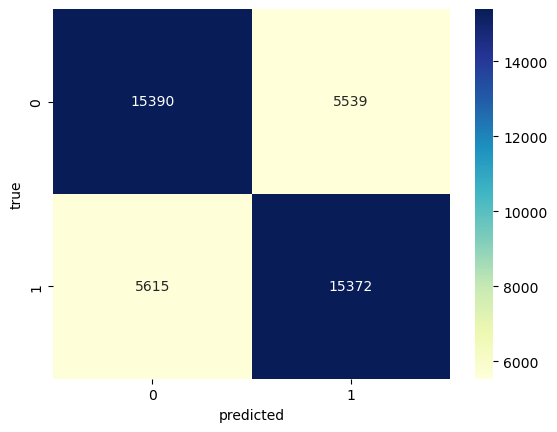

In [31]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(cm)
print(accuracy)
labels = list(y_train.keys())

s = sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt=".0f")
s.set_xlabel("predicted")
s.set_ylabel("true")
plt.show()


## ROC curve

[0.4507268  0.84346911 0.2068101  0.93204383 0.09894656 0.8065704
 0.27540947 0.69324092 0.45212743 0.32415368 0.86426851 0.846485
 0.12114665 0.70073114 0.21648489 0.16412517 0.94107166 0.28113004
 0.0394069  0.52267748 0.76469396 0.85951493 0.24541797 0.27028556
 0.77842326 0.56552023 0.70145923 0.6918179  0.47462652 0.26934789
 0.46922431 0.59478455 0.08798903 0.76021363 0.37841088 0.66560857
 0.45027219 0.60462669 0.85382143 0.58485452 0.26340708 0.79150955
 0.74052303 0.14641054 0.67952086 0.10199049 0.36573844 0.60309257
 0.46363973 0.41568867 0.87661966 0.4841007  0.5918185  0.73204657
 0.14754039 0.921427   0.52945897 0.62950255 0.85694186 0.15342216
 0.35967572 0.23250027 0.1275811  0.42804814 0.12760681 0.86376545
 0.71918561 0.37321896 0.64046601 0.74562949 0.01411682 0.42546598
 0.62856624 0.84072402 0.37507028 0.04774563 0.57179351 0.90739291
 0.77105403 0.21461136 0.73255764 0.93161833 0.08730227 0.37337542
 0.15443608 0.79981964 0.14092525 0.91692317 0.13630402 0.9148976

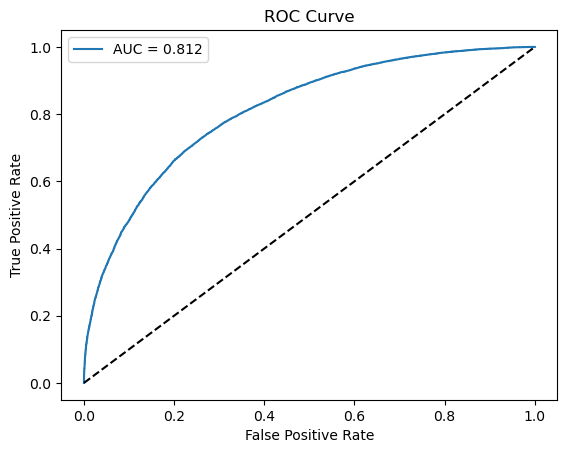

In [32]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = gbr.predict_proba(X_test)[:, 1]
print(y_pred_proba[:100]) 

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### features

In [33]:
features = pd.DataFrame(gbr.feature_importances_, index = X_players_ranked.columns)

In [34]:
features.sort_values(0, ascending=False)

,0
positioning_percent_behind_ball,0.252790
positioning_percent_infront_ball,0.222326
positioning_percent_most_forward,0.090112
positioning_time_infront_ball,0.065119
positioning_time_most_forward,0.048666
positioning_avg_distance_to_ball_possession,0.044720
positioning_percent_offensive_third,0.039322
positioning_time_most_back,0.036888
positioning_time_offensive_third,0.036189
positioning_percent_most_back,0.030703


# Model 2 -------------------------------------------------

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
gbr2 = GradientBoostingClassifier(
    n_estimators=500,
    min_samples_split=10,
    learning_rate= 0.1,
    max_depth=7
)

In [37]:
# next is 1 min / now depth=7 is 16 min / depth=9 21 min

In [38]:
gbr2.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=7, min_samples_split=10, n_estimators=500)

### metrics

In [39]:
# next is 2 min / 11 min

In [40]:
cross_val_score(gbr2, X_train, y_train, cv=3, n_jobs=-1).mean()

0.7267745843703676

In [41]:
y_pred2 = gbr2.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
y_pred2 = gbr2.predict(X_test)
y_pred_classes = y_pred2
y_test_classes = y_test
print("DNN Accuracy:", accuracy_score(y_test_classes, y_pred_classes))

DNN Accuracy: 0.7358049432197729


In [44]:
gbr2.score(X_test, y_test)

0.7358049432197729

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

       False       0.73      0.74      0.74     20929
        True       0.74      0.73      0.74     20987

    accuracy                           0.74     41916
   macro avg       0.74      0.74      0.74     41916
weighted avg       0.74      0.74      0.74     41916



In [47]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [48]:
accuracy = accuracy_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

print("accuracy", accuracy)
print("recall", recall)
print("precision", precision)
print("f1", f1)

accuracy 0.7358049432197729
recall 0.7346452565874112
precision 0.7368924150456435
f1 0.7357671200190886


### Confusion matrix

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
print(confusion_matrix(y_test, y_pred2))

[[15424  5505]
 [ 5569 15418]]


[[15424  5505]
 [ 5569 15418]]
0.7358049432197729


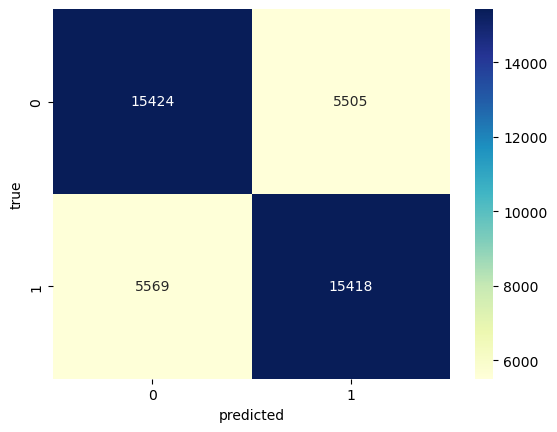

In [51]:
cm = confusion_matrix(y_test, y_pred2)
accuracy = accuracy_score(y_test, y_pred2)
print(cm)
print(accuracy)
labels = list(y_train.keys())

s = sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt=".0f")
s.set_xlabel("predicted")
s.set_ylabel("true")
plt.show()


## ROC curve

[0.35053052 0.88392338 0.32299837 0.91078454 0.06737315 0.86963349
 0.32693639 0.73733196 0.34508332 0.21671125 0.93724564 0.89488493
 0.03753734 0.68424762 0.13106372 0.06642517 0.96432441 0.19025466
 0.02852508 0.35762047 0.80428677 0.9076526  0.19340879 0.37809588
 0.69032981 0.60167724 0.7960978  0.76304648 0.43451637 0.25993885
 0.41960104 0.63753888 0.07626337 0.79830726 0.06265542 0.71222328
 0.52104654 0.43075534 0.92842028 0.58735606 0.21370407 0.78601335
 0.86702176 0.11406787 0.68917305 0.07414641 0.24328991 0.60766713
 0.38742407 0.46942457 0.86439734 0.63168011 0.47879104 0.63192979
 0.06243566 0.96429375 0.70066947 0.6330559  0.88652836 0.19416356
 0.32944496 0.26193394 0.11299354 0.38973872 0.11001117 0.79853049
 0.74711503 0.29765807 0.71064104 0.73775052 0.00812117 0.49232515
 0.52762335 0.9284748  0.32194108 0.05406886 0.47970953 0.93671144
 0.72613831 0.22971432 0.81284359 0.91892976 0.12187033 0.45978458
 0.13660497 0.84752759 0.10293301 0.96380186 0.11591375 0.9429

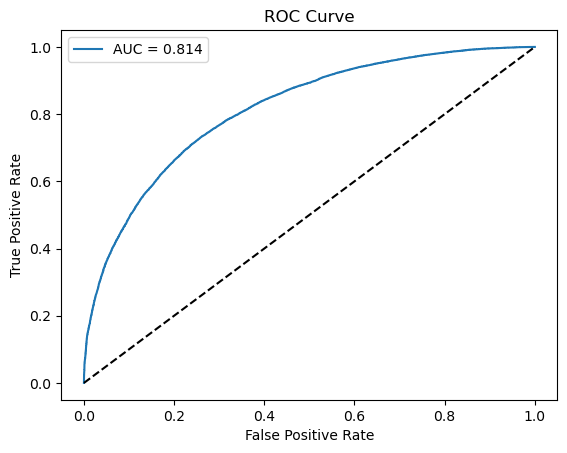

In [52]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = gbr2.predict_proba(X_test)[:, 1]
print(y_pred_proba[:100]) 

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### features

In [53]:
features = pd.DataFrame(gbr2.feature_importances_, index = X_players_ranked.columns)

In [54]:
features.sort_values(0, ascending=False)

,0
positioning_percent_behind_ball,0.163410
positioning_percent_infront_ball,0.127924
positioning_percent_most_forward,0.089265
positioning_avg_distance_to_ball_possession,0.049329
positioning_time_offensive_third,0.041245
positioning_time_most_back,0.037937
positioning_time_infront_ball,0.030698
positioning_percent_most_back,0.029301
positioning_time_most_forward,0.029099
positioning_percent_offensive_third,0.027146
